In [1]:
from core import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
cell_path1 = './lr/after/datas/all_a/all_a.h5ad' #path for single-cell data1
folder_path1 = './lr/after/datas/all_a/'    #folder to save the results
radius1 = 0 # parameter for converting into meta cell

cell_path2 = './lr/after/datas/all_b/all_b.h5ad' #path for single-cell data2
folder_path2 = './lr/after/datas/all_b/'  
radius2 = 0

resolution=0.4 #parameter for clustering
method='average' # method we calcuclate the center value 
 
n_pca = 20 #pca number
meta_col = 'batch' #celltype col in the single-cell file
epoches1 = 10 #number for embedding
epoches2 = 2 #number for rotation

c1=0.5 # threshold for merging
c2=1  # threshold for merging

In [58]:
merge_by_radius(cell_path1,folder_path1,radius1,method,meta_col)


100%|████████████████████████████████████| 800/800 [00:00<00:00, 1890390.54it/s]


In [59]:
merge_by_radius(cell_path2,folder_path2,radius2,method,meta_col)


100%|████████████████████████████████████| 800/800 [00:00<00:00, 2184533.33it/s]


In [3]:
adata1 = sc.read_h5ad(folder_path1+ 'adata.h5ad')
adata2 = sc.read_h5ad(folder_path2+ 'adata.h5ad')

In [4]:
preprocessing_cluster(adata1,N_pcs=n_pca,resolution=resolution)
preprocessing_cluster(adata2,N_pcs=n_pca,resolution=resolution)

inter_gene = sort_data(adata1,adata2)

tmp1 = calculate_cluster_centroid_for_genes(adata1,inter_gene,folder_path1)
tmp2 = calculate_cluster_centroid_for_genes(adata2,inter_gene,folder_path2)

meta_list1 = calculate_cluster_celltype(adata1);
meta_list2 = calculate_cluster_celltype(adata2);

2024-06-10 16:08:43.384658: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
adata1.obs.groupby('leiden').describe()

celltype                
          count unique top freq
leiden                         
0           200      1   1  200
1           200      1   2  200
2           200      1   3  200
3           200      1   0  200

In [6]:
adata2.obs.groupby('leiden').describe()

celltype                
          count unique top freq
leiden                         
0           200      1   3  200
1           200      1   1  200
2           200      1   2  200
3           200      1   0  200

./lr/after/datas/all_a/datas.data length:4
Generating all pairs superset
	 Epoch 0 | average train loss: 0.896430
Optimization finished.
	 Epoch 1 | average train loss: 0.902411
Optimization finished.
	 Epoch 2 | average train loss: 0.902368
Optimization finished.
	 Epoch 3 | average train loss: 0.902007
Optimization finished.
	 Epoch 4 | average train loss: 0.901593
Optimization finished.
	 Epoch 5 | average train loss: 0.899791
Optimization finished.
	 Epoch 6 | average train loss: 0.890219
Optimization finished.
	 Epoch 7 | average train loss: 0.891430
Optimization finished.
	 Epoch 8 | average train loss: 0.890606
Optimization finished.
	 Epoch 9 | average train loss: 0.890913
Optimization finished.
	 Epoch 0 | average train loss1: 0.311289
	 Epoch 0 | average train loss2: 0.298144
	 Epoch 1 | average train loss1: 0.286719
	 Epoch 1 | average train loss2: 0.281726


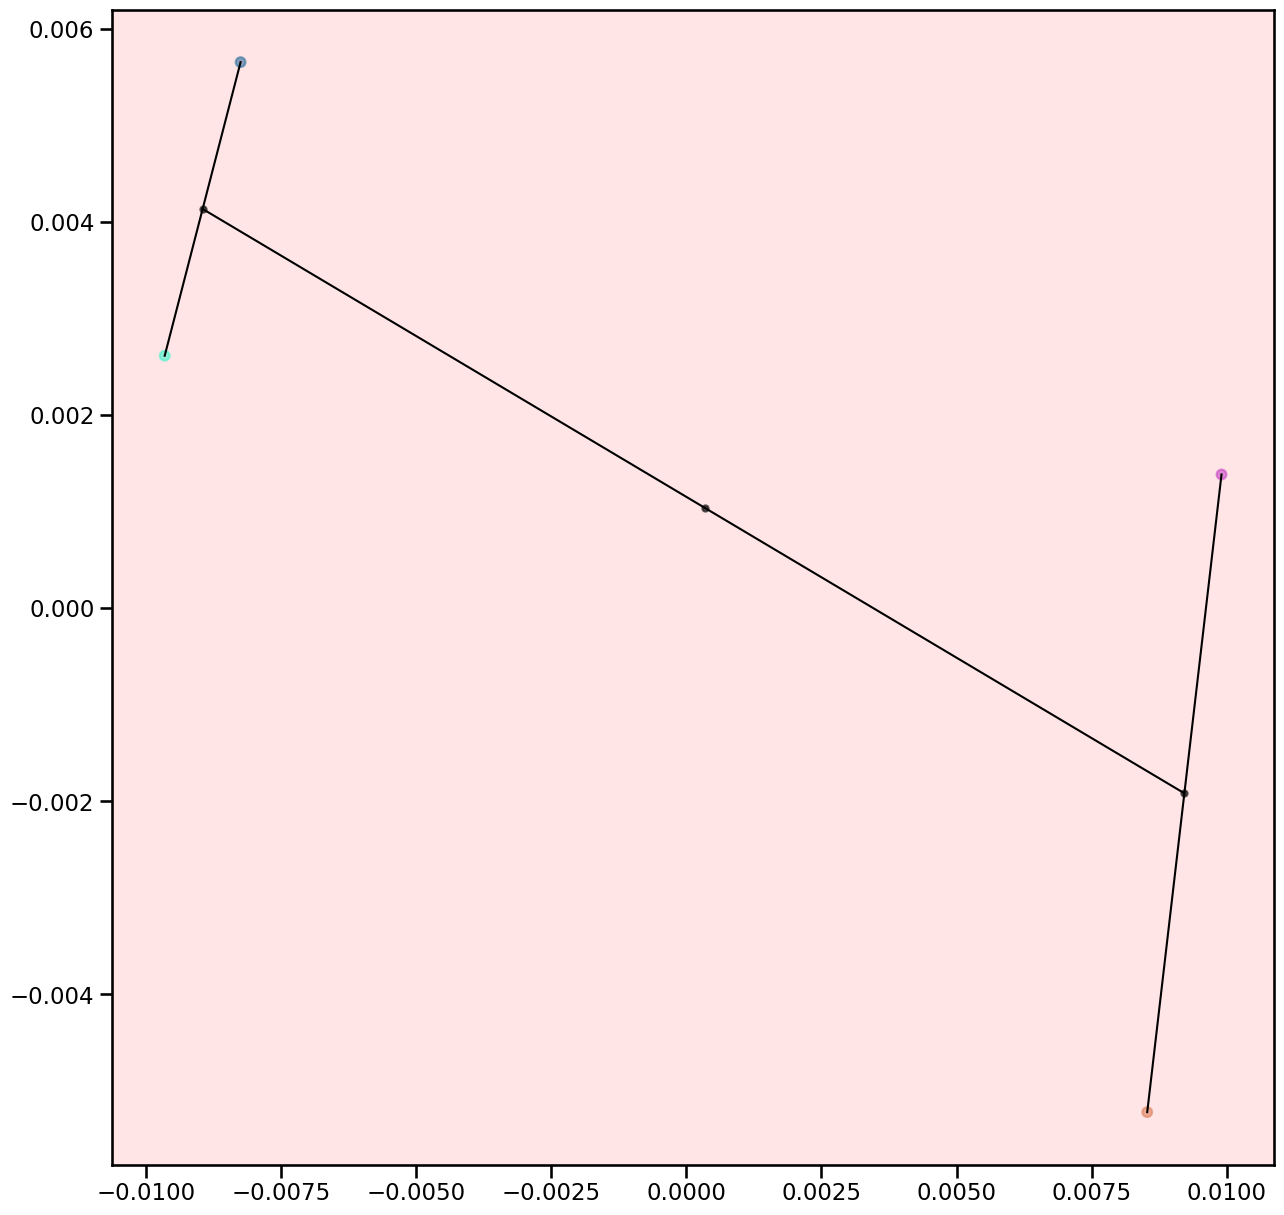

In [7]:
embeddings1,nodes1 = get_Hyper_tree(folder_path1 +'datas.data',1,tmp1.shape[1]+1,0,epoches1,epoches2,meta_list1,save_path=folder_path1)

In [8]:
merge_points_with_c(embeddings1,nodes1,folder_path1 +'datas.data',1,tmp1.shape[1]+1,0,folder_path1,epoches2,c1,c2)
nos1 = build_hyper_tree_from_folder(folder_path1,True)
add_meta(nos1[0],meta_list1,[])
show_tree(nos1[0],color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(nos1[0]);

4 3
5 2
False
6 3
False
True
{'3': '#184e77', '1': '#1a759f', '0': '#168aad', '2': '#34a0a4', 'empty': '#fff'}


./lr/after/datas/all_b/datas.data length:4
Generating all pairs superset
	 Epoch 0 | average train loss: 0.908778
Optimization finished.
	 Epoch 1 | average train loss: 0.907920
Optimization finished.
	 Epoch 2 | average train loss: 0.906620
Optimization finished.
	 Epoch 3 | average train loss: 0.909067
Optimization finished.
	 Epoch 4 | average train loss: 0.908213
Optimization finished.
	 Epoch 5 | average train loss: 0.908188
Optimization finished.
	 Epoch 6 | average train loss: 0.907219
Optimization finished.
	 Epoch 7 | average train loss: 0.905574
Optimization finished.
	 Epoch 8 | average train loss: 0.908992
Optimization finished.
	 Epoch 9 | average train loss: 0.908190
Optimization finished.
	 Epoch 0 | average train loss1: 0.328938
	 Epoch 0 | average train loss2: 0.318234
	 Epoch 1 | average train loss1: 0.328951
	 Epoch 1 | average train loss2: 0.315757
4 0
False
	 Epoch 0 | average train loss1: 0.361600
	 Epoch 0 | average train loss2: 0.360512
	 Epoch 1 | average train

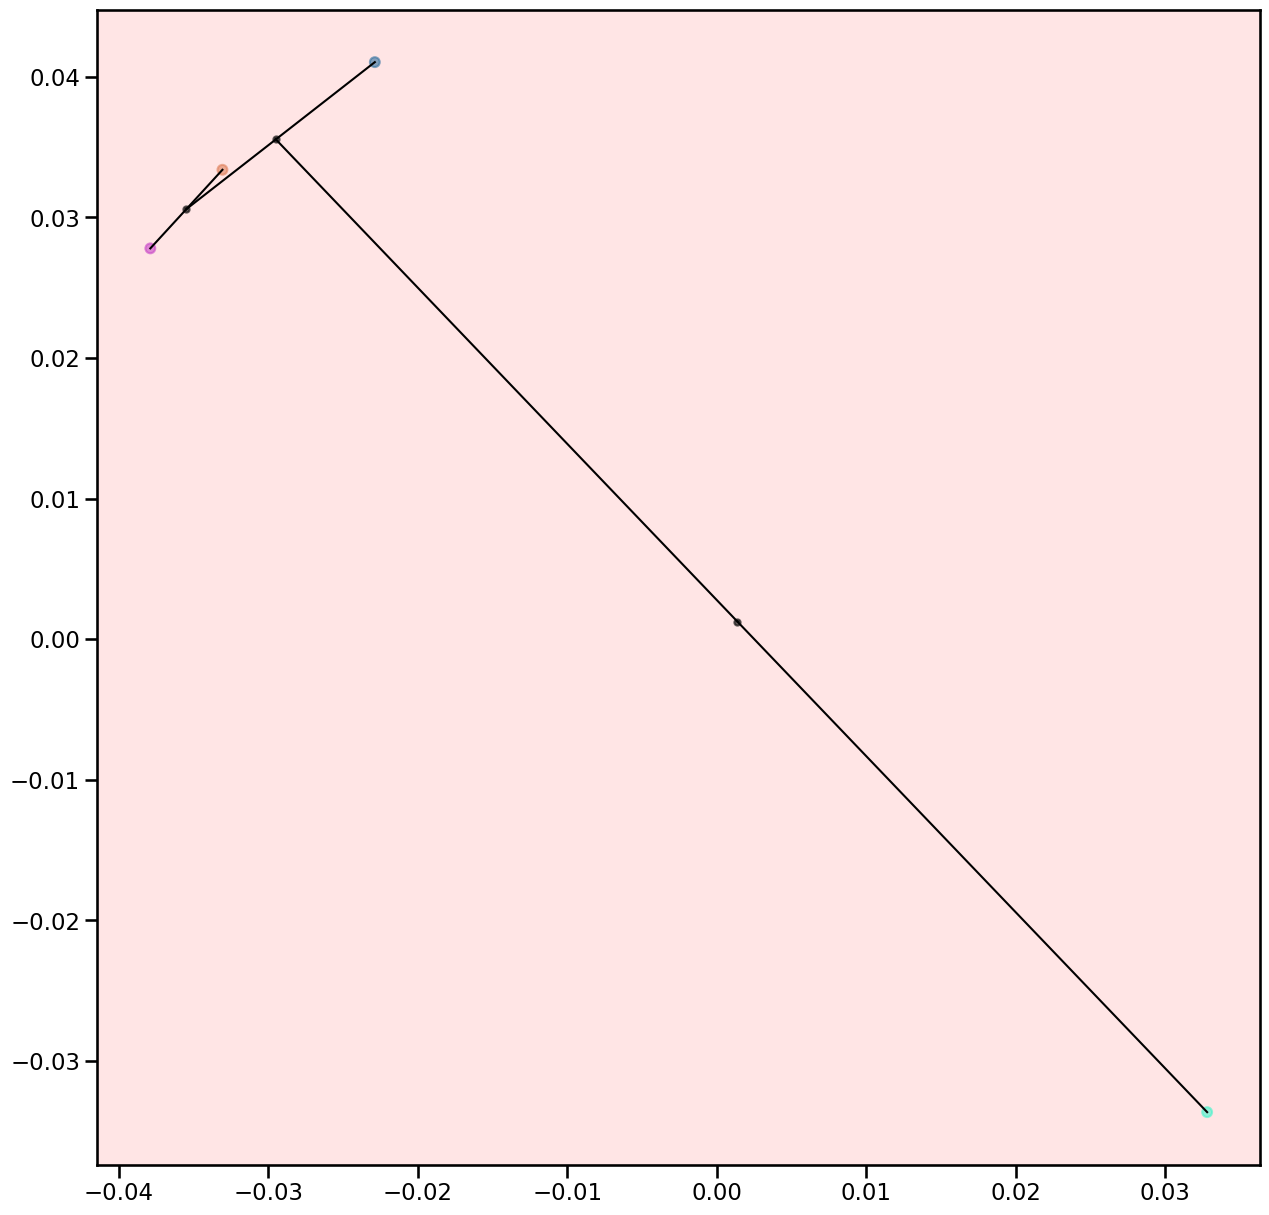

In [9]:
embeddings2,nodes2 = get_Hyper_tree(folder_path2 +'datas.data',1,tmp2.shape[1]+1,0,epoches1,epoches2,meta_list2,save_path=folder_path2)
merge_points_with_c(embeddings2,nodes2,folder_path2 +'datas.data',1,tmp2.shape[1]+1,0,folder_path2,epoches2,c1,c2)
nos2 = build_hyper_tree_from_folder(folder_path2,True)
add_meta(nos2[0],meta_list2,[])
show_tree(nos2[0],color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(nos2[0]);

In [10]:
datas1 = sc.read_h5ad('./lr/after/datas/all_a.h5ad')
datas2 = sc.read_h5ad('./lr/after/datas/all_b.h5ad')

datas1.obsm

AxisArrays with keys: meta

In [11]:
temp1 = datas1.obsm['meta']
temp1.index = adata1.to_df().index
temp2 = datas2.obsm['meta']
temp2.index = adata2.to_df().index


In [12]:
adata1.obsm['meta'] = temp1
adata2.obsm['meta'] = temp2

In [13]:
nodes1 = build_hyper_tree_from_folder(folder_path1,True)
nodes2 = build_hyper_tree_from_folder(folder_path2,True)

nodes_merge1 = [];
nodes_merge2 = [];
add_meta(nodes1[0],meta_list1,[])
add_meta(nodes2[0],meta_list2,[])


In [14]:
datas1.obs['leiden'] = adata1.obs['leiden'].tolist()
datas2.obs['leiden'] = adata2.obs['leiden'].tolist()




In [15]:
T=tree_alignment(nodes1[0],nodes2[0],1,True,datas1,datas2);
minn = T.run_alignment();
T.show_ans();

start spilting data
View of AnnData object with n_obs × n_vars = 600 × 8786
    obs: 'batch', 'leiden'
    obsm: 'meta'
finish 1
start filtering LRIs with spatial data
reading data
<bound method NDFrame.head of                 cell          x         y  cell_type
0    cell1-0-1-0-0-0   6.373032  8.933043        1.0
1    cell2-0-1-0-0-0   1.613726  8.248680        1.0
2    cell3-0-1-0-0-0   1.373817  2.201218        1.0
3    cell4-0-1-0-0-0   0.809356  9.415871        1.0
4    cell5-0-1-0-0-0   2.810129  6.630638        1.0
..               ...        ...       ...        ...
595  cell196-1-1-0-1  11.378252  1.025635        2.0
596  cell197-1-1-0-1   7.743184  2.681785        2.0
597  cell198-1-1-0-1   9.194564  6.090764        2.0
598  cell199-1-1-0-1  12.555637  7.740070        2.0
599  cell200-1-1-0-1  12.855511  7.345174        2.0

[600 rows x 4 columns]>
DataFrame 中不存在名为 '_index' 的列。
Index(['cell', 'x', 'y', 'cell_type'], dtype='object')
st_gene_len----8786
cell_name_list----600
r

In [23]:
ans = T.get_ans()
G=show_graph(ans,nodes1[0],nodes2[0]);
G.show_fig()

{'3': '#f2a620', '1': '#ade041', '0': '#2e2190', '2': '#8f9f47', 'empty': '#fff'}


In [1]:
G

NameError: name 'G' is not defined

In [17]:
T.anslist

[('3_0', '3_0'), ('2_3', '0_3'), ('0_1', '1_1'), ('1_2', '2_2')]

In [18]:
T.lrcost

{('2_3', '2_2'): 0.998649958513675,
 ('0_1', '2_2'): 0.9972338968251412,
 ('1_2', '0_3'): 0.9967740102210121,
 ('1_2', '1_1'): 0.9968559499547773,
 ('0_1', '1_1'): 0.9789170892785498,
 ('2_3', '0_3'): 0.9973066475601206,
 ('2_3', '1_1'): 0.9974635202716764,
 ('0_1', '0_3'): 0.9958266427722968,
 ('1_2', '2_2'): 0.9726675492875986,
 ('3_0', '3_0'): 0.9955586108177712,
 ('3_0', '0_3'): 0.9978831988552346,
 ('3_0', '1_1'): 0.9985713509261007,
 ('3_0', '2_2'): 0.9986882824670209,
 ('1_2', '3_0'): 0.9967031804834082,
 ('2_3', '3_0'): 0.9966413858184501,
 ('0_1', '3_0'): 0.9960286157061911}

In [ ]:
for i1 in T.anslist:
    i=i1[0]
    j=i1[1]

    if(len(i.split('_'))!=1 and len(j.split('_'))!=1):
        t1  = i.split('_')[0]
        t2 = j.split('_')[0]
        t1 = str(round((1+int(t1)/100),2))
        t2 = str(round((2+int(t2)/100),2))
        print(i,j)
        print(t1,t2)

    else:
        continue
    df = './lr/after/datas/temp/cci_result_{}_{}.pkl'.format(t1,t2);
    df2 = './lr/after/datas/temp/cci_result_{}_{}.pkl'.format(t2,t1);
    if(os.path.isfile(df)):
        t = pd.read_pickle(df)
        print( t['lr_score']['score'].mean())
        pass;
    elif(os.path.isfile(df2)):
        t = pd.read_pickle(df2)
        print( t['lr_score']['score'].mean() )

In [ ]:
round((1+ 14/100 ),2)

In [ ]:
t1 = [1+int(i)/100 for i in datas1.obs['leiden'].tolist()]
t2 = [2+int(i)/100 for i in datas2.obs['leiden'].tolist()]

t1

In [ ]:
datas1.obsm['meta']['cell_type']=t1
datas2.obsm['meta']['cell_type']=t2

datas1.obsm['meta'],datas2.obsm['meta'],

In [ ]:
tdatas = datas1.concatenate(datas2)
tdatas.obsm['meta']
tdatas.write_h5ad('./lr/after/datas/temp/AN.h5ad')

In [ ]:
tdatas.obsm['meta']['cell_type'].unique()

In [ ]:
T.lrcost

In [ ]:




n='temp'

'python3 lr/after/CytoTour.py lr/after/datas/lr_database.csv lr/after/datas/pathways.tsv lr/after/datas/{}/split 10000 lr/after/datas/{}/AN.h5ad --out lr/after/datas/{}'.format(n,n,n)



In [ ]:
'python3 lr/after/splith5ad.py lr/after/datas/{}/AN.h5ad lr/after/datas/{}/split lr/after/datas/pathways.tsv 10000'.format(n,n)


In [ ]:
import glob
files = glob.glob('./lr/after/datas/temp/*')
files

In [ ]:
rate,anslist,ans = run_alignment(nodes1,nodes2,folder_path1,folder_path2,meta_list1,meta_list2);


In [ ]:
def lr_s(n):
    
    a1= 'python3 lr/after/splith5ad.py lr/after/datas/{}/AN.h5ad lr/after/datas/{} lr/after/datas/pathways.tsv 1000'.format(n,n)
    a2 = 'python3 lr/after/CytoTour.py lr/after/datas/lr_database.csv lr/after/datas/pathways.tsv lr/after/datas/{} 1000 lr/after/datas/{}/AN.h5ad --out lr/after/datas/{}'.format(n,n,n)
    return a1,a2 
a1,a2 = lr_s('temp')
os.system(a1)
os.system(a2)
df = pd.read_pickle('./lr/after/datas/temp/cci_result_1.0_2.0.pkl')
df['lr_score']['score'].mean()

In [ ]:
df = pd.read_pickle('./lr/after/datas/temp/cci_result_1.0_2.0.pkl')
df['lr_score']['score'].mean()

In [37]:
T.lrcost

{('1_2', '2_0'): 0.9960990314043718,
 ('3_0', '3_1'): 0.997465347356729,
 ('3_0', '2_0'): 0.9980272504095742,
 ('1_2', '3_1'): 0.9965578555101393,
 ('2_1', '1_0'): 0.9932463684023263,
 ('2_1', '0_1'): 0.9941909952416116,
 ('1_2', '0_1'): 0.9955789725616552,
 ('3_0', '1_0'): 0.9955351807974113,
 ('3_0', '0_1'): 0.996755347767516,
 ('1_2', '1_0'): 0.9940038009670317,
 ('2_1', '3_1'): 0.9960402110171404,
 ('2_1', '2_0'): 0.9957231499741567,
 ('0_3', '6'): 0.9954311144739517,
 ('0_3', '1_0'): 0.9948801917897468,
 ('0_3', '0_1'): 0.9953882235263248,
 ('0_3', '3_1'): 0.9977763874486703,
 ('0_3', '2_0'): 0.9980321250373381,
 ('2_1', '6'): 0.994834643285722,
 ('3_0', '6'): 0.9938296771933006,
 ('1_2', '6'): 0.9956737269479787}